In [1]:
from typing import Dict, List, TypedDict
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    values: List[int]
    result: str

In [3]:
def process_values(state: AgentState) -> AgentState:
    """Processes the values in state and stores the result to the state."""
    state['result'] = f"Hi {state['name']}, The sum of your provided values is {sum(state['values'])}"
    return state

In [4]:
graph = StateGraph(AgentState)

graph.add_node("processor", process_values)

graph.set_entry_point(key='processor')
graph.set_finish_point(key='processor')

app = graph.compile()

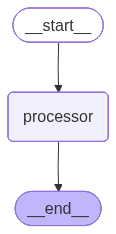

In [5]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result = app.invoke({'name': 'John Doe', 'values': list(range(1, 10))})

In [7]:
result

{'name': 'John Doe',
 'values': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'result': 'Hi John Doe, The sum of your provided values is 45'}